# 1. 线性回归

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

* 线性模型视图学得一个通过属性的线性组合来进行预测的函数：
 $f(x) = w_1x_1 + w_2x_2+...+w_dx_d+b$其中$w=(w_1;w_2;...;w_d)$.$w$和$b$学得之后模型就可以确定
* 由于$w$直观表达了各个属性在预测的重要性，因此线性模型具有很好的可解释性。

求导：
![](./img/1.PNG)

In [69]:
class LinearRegression():
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)#给最前面插入一列全为1,在这里f = b + x_1*w_1(当做：f = x_0*b + x_1*w_1,x_0=1)
        print ('in fit X.shape: ',X.shape)        
        X_ = np.linalg.inv(X.T.dot(X))#np.linalg.inv()：矩阵求逆
        self.w = X_.dot(X.T).dot(y)
        

    def predict(self, X):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred
    
    def get_w(self):
        return self.w

In [70]:
#均方误差
def mean_squared_error(y_pred,y_true):
    mse = np.mean(np.power(y_true - y_pred, 2))
    return mse

### 数据集介绍：diabetes dataset数据集
 这是一个糖尿病的数据集，主要包括442行数据，10个属性值，分别是：Age(年龄)、性别(Sex)、Body mass index(体质指数)、Average Blood Pressure(平均血压)、S1~S6一年后疾病级数指标。Target为一年后患疾病的定量指标。

## 1.1 单变量线性回归

In [71]:
diabetes = datasets.load_diabetes()
# Use only one feature
X = diabetes.data
y = diabetes.target
print(X[:2])
print("X.shape: ", X.shape)

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]
X.shape:  (442, 10)


X.shape:  (442, 1)
in fit X.shape:  (342, 2)
Mean Squared Error: 3752.769434735645


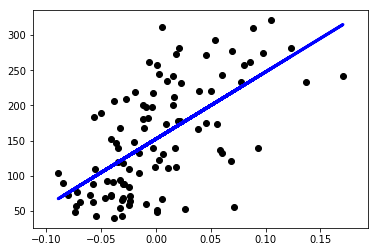

In [72]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use Body mass index(体质指数) feature
X = diabetes.data[:,2:3]
print ('X.shape: ',X.shape)
# Split the data into training/testing sets
x_train, x_test = X[:-100], X[-100:]

# Split the targets into training/testing sets
y_train, y_test = diabetes.target[:-100], diabetes.target[-100:]

clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Print the mean squared error
print ("Mean Squared Error:", mean_squared_error(y_pred,y_test))
# Plot the results
plt.scatter(x_test[:,0], y_test,  color='black')
plt.plot(x_test[:,0], y_pred, color='blue', linewidth=3)
plt.show()

In [80]:
theta=list(clf.get_w())
print("f= %f+%f*x"%(theta[0],theta[1]))

f= 152.276718+953.360627*x


## 1.2 多变量线性回归

In [42]:
# Use all variables
X = diabetes.data
print ('X.shape: ',X.shape)
# Split the data into training/testing sets
x_train, x_test = X[:-100], X[-100:]

# Split the targets into training/testing sets
y_train, y_test = diabetes.target[:-100], diabetes.target[-100:]

clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Print the mean squared error
print ("Mean Squared Error:", mean_squared_error(y_pred,y_test))

X.shape:  (442, 10)
in fit X.shape:  (342, 11)
Mean Squared Error: 2693.8531990938764


## 1.3 梯度下降法
* 以单变量线性回归为例:$f(x)=b+w_1x$, 参数：$b$,$w_1$(在下面：theta0:b;theta1:$w_1$)
* 以单变量线性回归为例的原因：简单，且可以和前面的都连续在一起看

* 确定theta0,只改变theta1

In [91]:
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

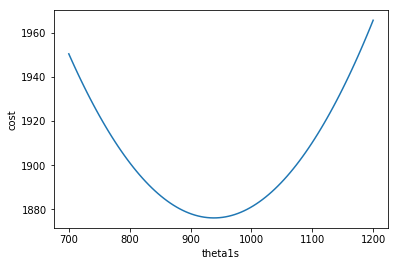

In [92]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = diabetes.data[:,2:3]
x_train, x_test = X[:-100], X[-100:]
y_train, y_test = diabetes.target[:-100], diabetes.target[-100:]
theta0 = 152.276718 #前面计算出来的
theta1s = np.linspace(700,1200,100)
costs = []
for theta1 in theta1s:
    costs.append(cost(theta0, theta1, x_test, y_test))

plt.plot(theta1s, costs)
plt.xlabel("theta1s")
plt.ylabel("cost")
plt.show()

* 改变theta0,theta1

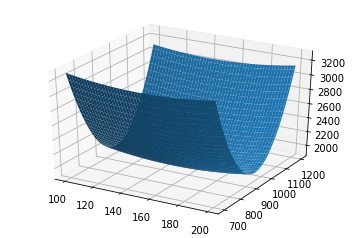

In [95]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Use these for your excerise 
theta0s = np.linspace(100,200,100)
theta1s = np.linspace(700,1200, 100)
COST = np.empty(shape=(100,100))
# np.meshgrid will build a coordinate matrices of x and y
# Meshgrid for paramaters 
T0S, T1S = np.meshgrid(theta0s, theta1s)
# for each parameter combination compute the cost
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0],x_test, y_test)

# make 3d plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X=T0S,Y=T1S,Z=COST)
plt.show()

* 由上图也可以看出单变量线性回归的直接使梯度=0的可行性。
### 梯度下降法
![](./img/2.PNG)

* 使用梯度下降法再做$f(x)=b+w_1x$, 参数：$b$,$w_1$(在下面：theta0:b;theta1:$w_1$)

   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


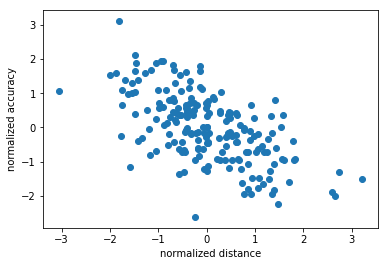

In [114]:
import pandas
import matplotlib.pyplot as plt

# Read data from csv
pga = pandas.read_csv("./data/pga.csv")


# Normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

In [102]:
# Partial derivative of cost in terms of theta0
def partial_cost_theta0(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Difference between hypothesis and observation
    diff = (h - y)
    # Compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial
# Partial derivative of cost in terms of theta1
def partial_cost_theta1(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Hypothesis minus observed times x
    diff = (h - y) * x
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

* 以下可以看成为是批量梯度下降

Theta1 = -0.6046983166379609


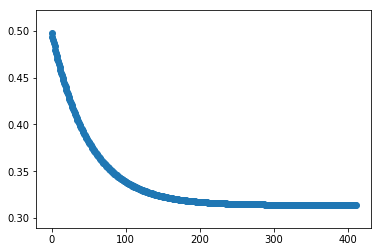

In [115]:
# x is our feature vector -- distance
# y is our target variable -- accuracy
# alpha is the learning rate
# theta0 is the intial theta0 
# theta1 is the intial theta1
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # Maximum number of iterations
    counter = 0      # Intialize a counter
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  ## Initial cost
    costs = [c]     # Lets store each update
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    convergence_thres = 0.000001  
    cprev = c + 10   
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        #             so we update after finding the partial derivatives
        theta0 -= update0
        theta1 -= update1
        
        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute the new cost
        c = cost(theta0, theta1, pga.distance, pga.accuracy)

        # Store updates
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])
descend = gradient_descent(pga.distance, pga.accuracy, alpha=.01)
plt.scatter(range(len(descend["costs"])), descend["costs"])
plt.show()

## 1.4 logistic回归

![](./img/3.PNG)
![](./img/4.PNG)

## The data

我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。

In [7]:
#三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
path = './data/LogiReg_data.txt'#
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])#header可以自定义数据名称
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [9]:
pdData.shape

(100, 3)

Text(0,0.5,'Exam 2 Score')

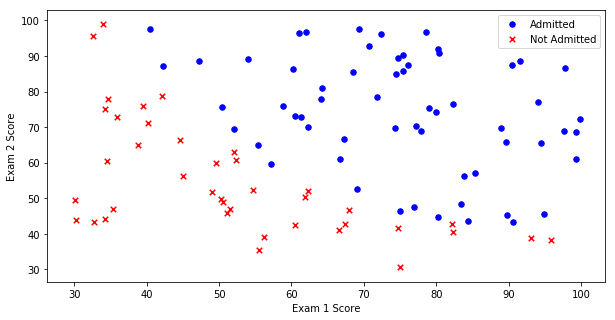

In [10]:
positive = pdData[pdData['Admitted'] == 1] # returns the subset of rows such Admitted = 1, i.e. the set of *positive* examples
negative = pdData[pdData['Admitted'] == 0] # returns the subset of rows such Admitted = 0, i.e. the set of *negative* examples
#以下开始画图了
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

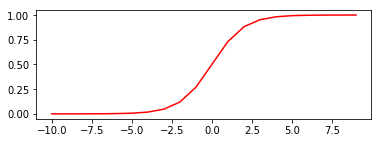

In [12]:
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(nums, sigmoid(nums), 'r')

### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

In [13]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [14]:
pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times
# set X (training data) and y (target variable)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]#取得数据维数
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]#Y值也就是被录取与否的结果值

# convert to numpy arrays and initalize the parameter array theta
#X = np.matrix(X.values)
#y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
theta = np.zeros([1, 3])

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [15]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$

In [16]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

### Gradient descent 

比较3种不同梯度下降方法

In [17]:
STOP_ITER = 0#按照迭代次数停止
STOP_COST = 1#根据迭代之后的损失值得变化，没啥变化了就停止
STOP_GRAD = 2#根据梯度变化值停止

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [18]:
import numpy.random
#洗牌：防止规律性数据可能的影响
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [19]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [20]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlim(0,)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### 不同的停止策略

#### 设定迭代次数

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.76s


array([[-0.00027127,  0.00705232,  0.00376711]])

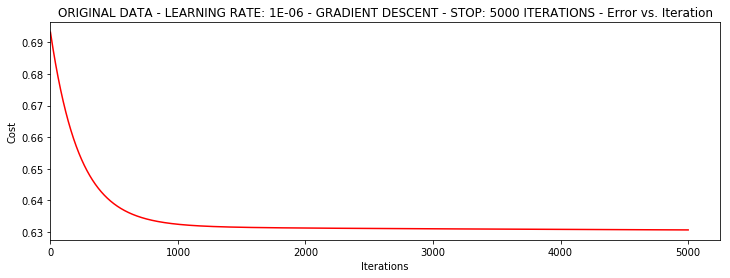

In [21]:
#选择的梯度下降方法是基于所有样本的
n=100#相当于基于样本做梯度下降
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

#### 根据损失值停止

设定阈值 1E-6, 差不多需要110 000次迭代 

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 44.06s


array([[-5.13364014,  0.04771429,  0.04072397]])

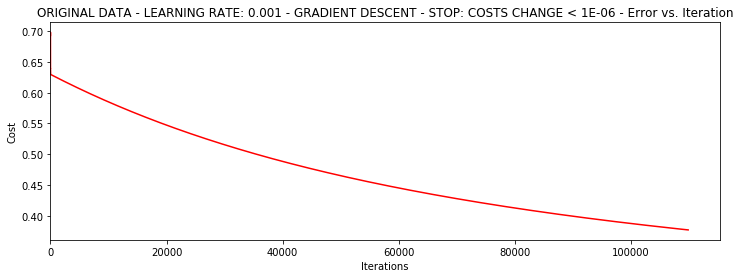

In [22]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

#### 根据梯度变化停止

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 16.99s


array([[-2.37033409,  0.02721692,  0.01899456]])

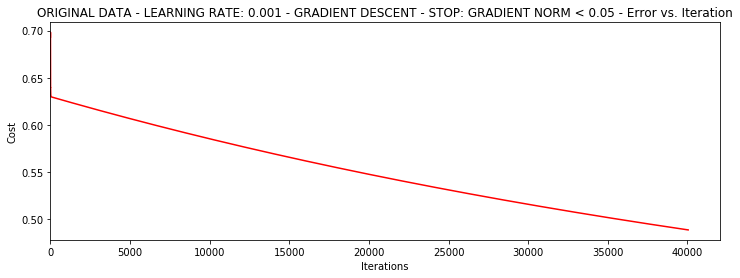

In [23]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

### 对比不同的梯度下降方法

#### Stochastic descent(随机梯度下降)

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.3888435   0.04093139  0.03533868]] - Iter: 5000 - Last cost: 1.48 - Duration: 0.75s


array([[-0.3888435 ,  0.04093139,  0.03533868]])

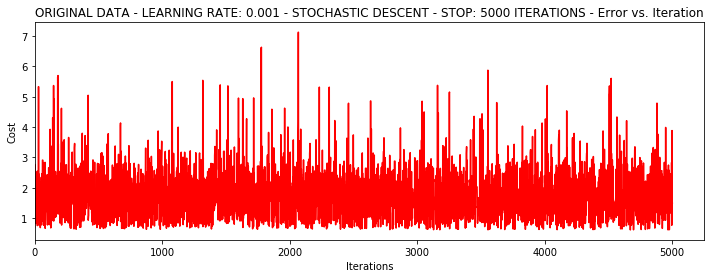

In [24]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

* 可以看出很不稳定

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202079  0.01007367  0.00099431]] - Iter: 15000 - Last cost: 0.63 - Duration: 2.22s


array([[-0.00202079,  0.01007367,  0.00099431]])

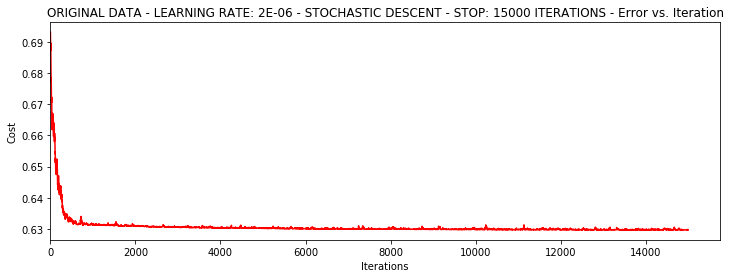

In [25]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

* 随机梯度下降：速度快，但稳定性差，需要很小的学习率

#### Mini-batch descent

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 5000 iterations
Theta: [[-0.3570035   0.0066665   0.00180078]] - Iter: 5000 - Last cost: 0.64 - Duration: 0.78s


array([[-0.3570035 ,  0.0066665 ,  0.00180078]])

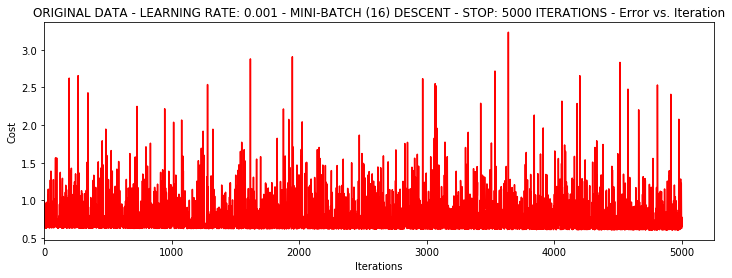

In [32]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=5000, alpha=0.001)

浮动仍然比较大，我们来尝试下对数据进行标准化
将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 5000 iterations
Theta: [[0.30778556 0.86459442 0.77403516]] - Iter: 5000 - Last cost: 0.38 - Duration: 0.88s


array([[0.30778556, 0.86459442, 0.77403516]])

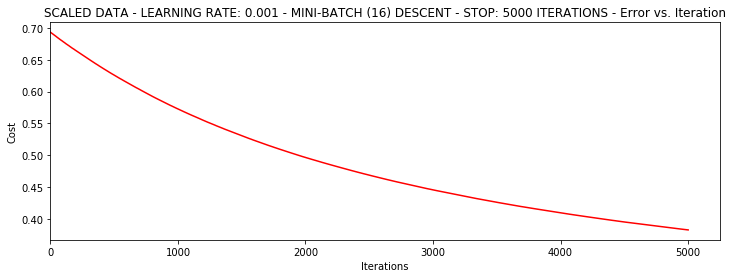

In [33]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, 16, STOP_ITER, thresh=5000, alpha=0.001)

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 2.26s


array([[0.3080807 , 0.86494967, 0.77367651]])

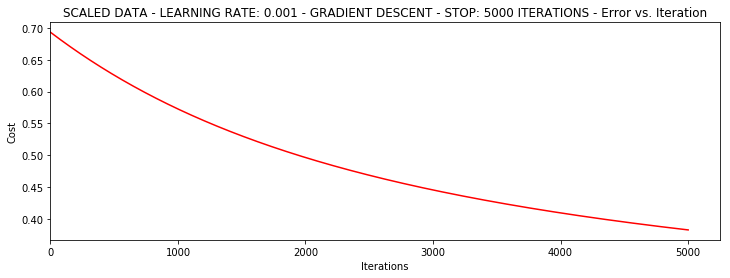

In [34]:
runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

* 它好多了！原始数据，只能达到达到0.61，而我们得到了0.38个在这里！ 所以对数据做预处理是非常重要的

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 27.17s


array([[1.0707921 , 2.63030842, 2.41079787]])

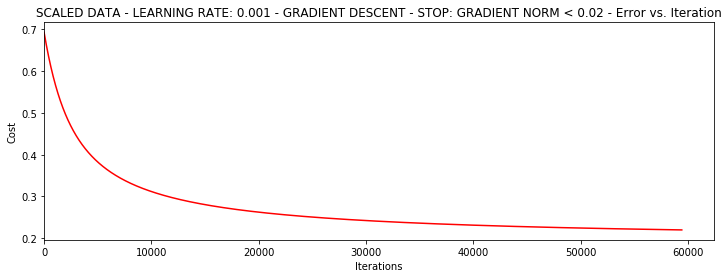

In [35]:
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)#按照梯度停止

* 更多的迭代次数会使得损失下降的更多！

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[1.14869347 2.79222474 2.56624623]] - Iter: 72592 - Last cost: 0.22 - Duration: 14.32s


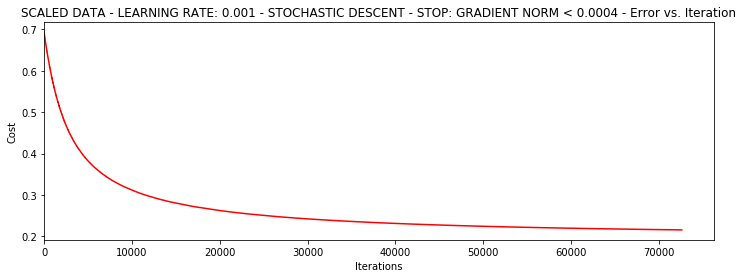

In [36]:
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

* 随机梯度下降更快，但是我们需要迭代的次数也需要更多，所以还是用batch的比较合适！！！

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[1.16706518 2.83061004 2.60629718]] - Iter: 3709 - Last cost: 0.21 - Duration: 0.81s


array([[1.16706518, 2.83061004, 2.60629718]])

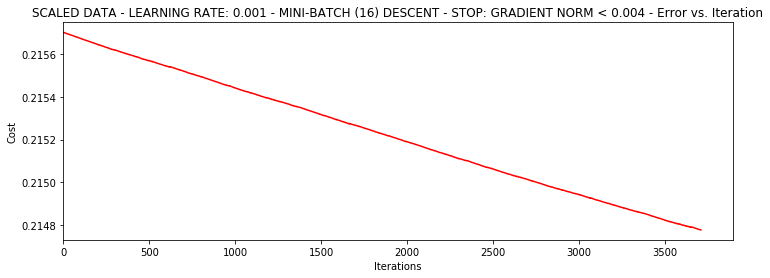

In [37]:
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

## 精度

In [38]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [39]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
